# INTRODUCTION TO THE SCIPY MODULE

In [1]:
import scipy as scp, numpy as np, matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

## SECTION 1: BASIC STUFF

### OPTIMIZATION

In [21]:
from scipy.optimize import minimize

Minimizing $f(x,y)=(x-1)^2+(y-2.5)^2$ subject to$$x-2y+2 \geq 0$$ $$-x-2y+6 \geq 0$$ $$-x+2y+2 \geq 0$$ $$x,y \geq 0$$

In [8]:
f = lambda x: (x[0] - 1) ** 2 + (x[1] - 2.5) ** 2  # x[0] IS x AND x[1] IS y
f([1, 2]) # INITIAL GUESS

0.25

In [9]:
cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: x[0]},
        {'type': 'ineq', 'fun': lambda x: x[1]})

bnds = ((0, None), (0, None))
minimize(f, (2, 0), bounds = bnds, constraints = cons)

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

### INTERPOLATION (1-D)

$$y=x^2\,\sin x$$

Text(0, 0.5, '$y$')

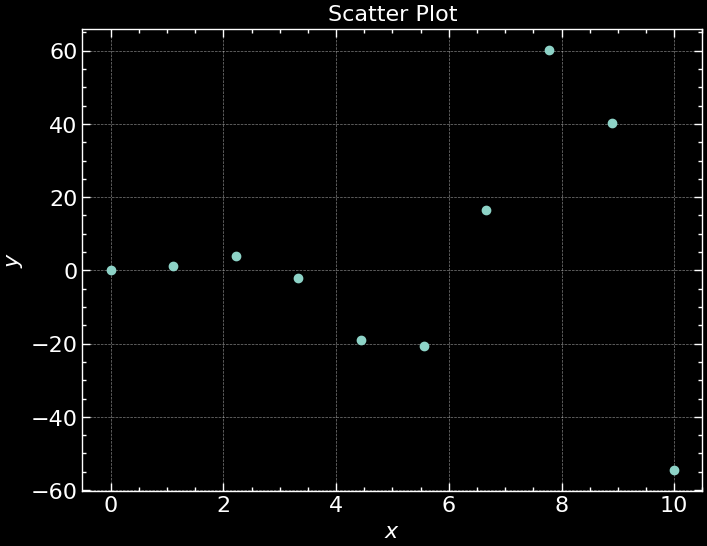

In [3]:
# SCATTER PLOT:

x = np.linspace(0, 10, 10)
y = x ** 2 * np.sin(x)

plt.scatter(x, y)
plt.title('Scatter Plot')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [4]:
from scipy.interpolate import interp1d

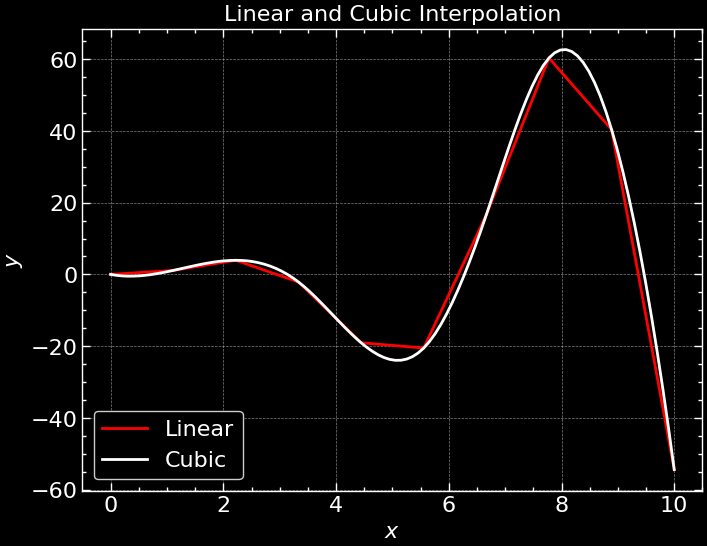

In [6]:
f = interp1d(x, y, kind = 'linear')
g = interp1d(x, y, kind = 'cubic')

x_dense = np.linspace(0, 10, 100)

plt.plot(x_dense, f(x_dense), color = 'red', label = 'Linear')
plt.plot(x_dense, g(x_dense), color = 'white', label = 'Cubic')
plt.title('Linear and Cubic Interpolation')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc = 'lower left')

### PROBLEM 1: MEAN PHOTON BEAM ENERGY

Given below is a distribution of energies in a beam of Photons. Compute their Mean Energy, given by $$\bar E=\frac{\int ES(E)\,dE}{\int S(E)\,dE}$$ where $S(E)$ is the Photon Density.

In [8]:
from scipy.integrate import quad

In [5]:
E_data = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.55, 0.662, 0.8, 1., 1.25, 1.5, 2. , 3., 4. , 5. , 6. , 8. , 10.])
S_data = np.array([0. , 0.332, 0.06, 0.086, 0.109, 0.131, 0.151, 0.185, 0.212, 0.238, 0.257, 0.274, 0.256, 0.205, 0.147, 0.096, 0.029, 0.002])

Text(0, 0.5, 'Density of Photons')

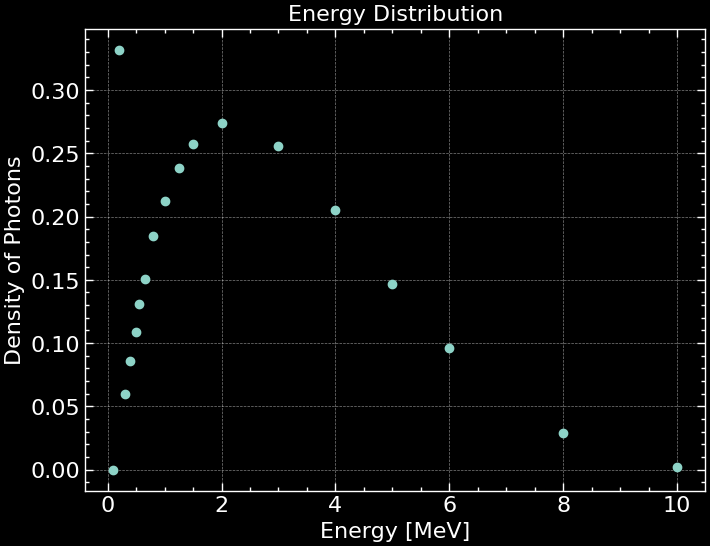

In [6]:
plt.scatter(E_data, S_data)
plt.title('Energy Distribution')
plt.xlabel('Energy [MeV]')
plt.ylabel('Density of Photons')

In [11]:
S_f = interp1d(E_data, S_data, 'cubic')

E_mean = (quad(lambda E: E * S_f(E), min(E_data), max(E_data))[0]) / (quad(lambda E: S_f(E), min(E_data), max(E_data))[0])
E_mean

3.29044871747208

### INTERPOLATION (2-D)

In [20]:
from scipy.interpolate import interp2d

In [23]:
x = np.array([0. , 0.25, 0.5, 0.75, 1. , 0. , 0.25,
             0.5, 0.75, 1., 0., 0.25, 0.5, 0.75, 1., 0., 0.25, 0.5, 0.75, 1. ,
             0., 0.25, 0.5, 0.75, 1.])
y = np.array([0. , 0. , 0. , 0. , 0. , 0.25, 0.25, 0.25,
             0.25, 0.25, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 0.75, 0.75,
             1. , 1. , 1. , 1. , 1.])
z = np.array([0. , 0.0625, 0.25, 0.5625, 1. , 0.0625, 0.125, 0.3125, 0.625, 1.0625,
             0.25, 0.3125, 0.5, 0.8125, 1.25, 0.5625, 0.625, 0.8125, 1.125, 1.5625,
             1. , 1.0625, 1.25, 1.5625, 2.])

In [25]:
z_f = interp2d(x, y, z, 'cubic')
z_f(0.2, 0.45456456)

array([0.24662894])

### CURVE FITTING

$$y=3x^2+2$$

Text(0, 0.5, '$y$')

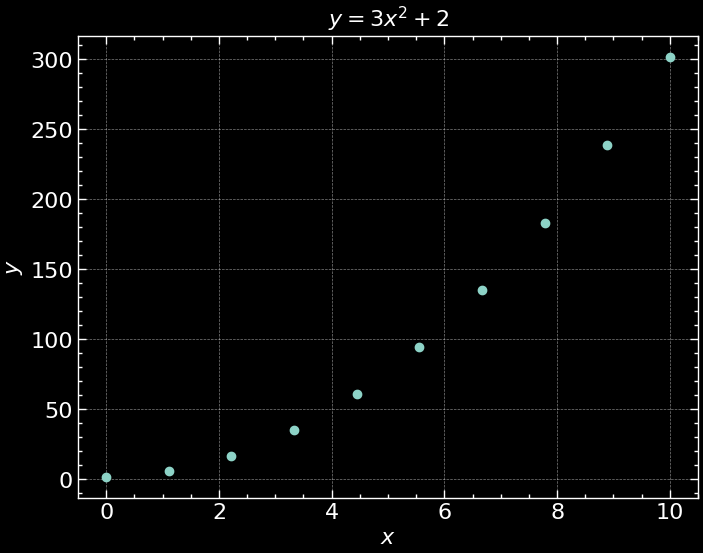

In [7]:
x_data = np.linspace(0, 10, 10)
y_data = 3 * x_data ** 2 + 2

plt.scatter(x_data, y_data)
plt.title('$y=3x^2+2$')
plt.xlabel('$x$')
plt.ylabel('$y$')

In [28]:
from scipy.optimize import curve_fit

In [23]:
def func(x, a, b):
    return a * x ** 2 + b

p_opt, cov = curve_fit(func, x_data, y_data, p0 = (1, 1)) 

In [24]:
p_opt, cov

(array([3., 2.]),
 array([[ 4.13297331e-34, -1.45419433e-32],
        [-1.45419433e-32,  9.65872308e-31]]))

### SPECIAL FUNCTIONS

Legendre's Polynomials: $P_l(x)$ satisfies $(1-x^2)y''-2xy'+l(l+1)=0$

In [8]:
from scipy.special import legendre

Text(0.5, 1.0, 'Legendre Plot')

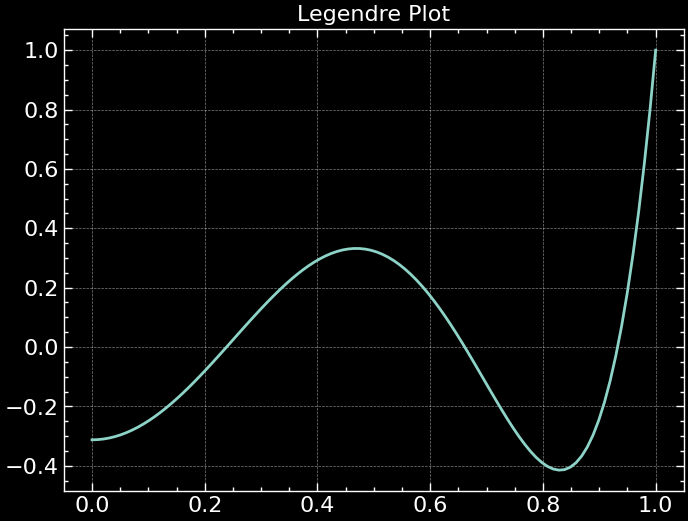

In [9]:
x = np.linspace(0, 1, 100)
plt.plot(x, legendre(6)(x))
plt.title('Legendre Plot')

Bessel's Functions $J_\alpha(x)$ satify $x^2y''+xy'+(x^2-\alpha^2)y=0$

In [10]:
from scipy.special import jv

Text(0.5, 1.0, 'Bessel Function')

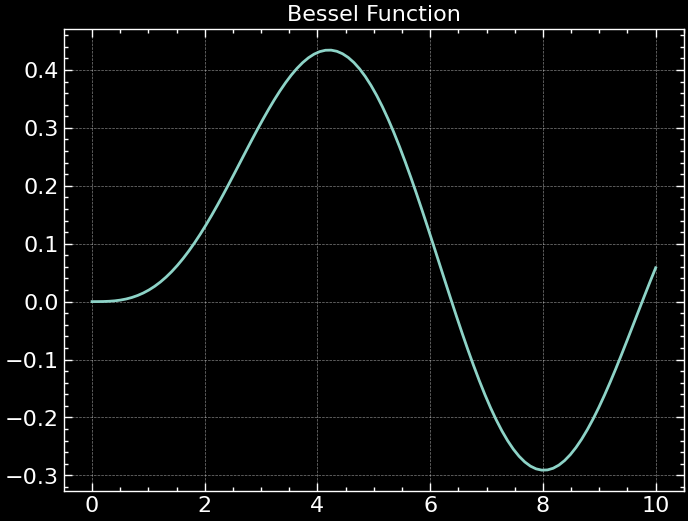

In [11]:
x = np.linspace(0, 10, 100)
plt.plot(x, jv(3, x))
plt.title('Bessel Function')

## SECTION 2: CALCULUS

### DERIVATIVES AND ANTIDERIVATIVES

In [12]:
from scipy.misc import derivative

$$f(x)=x^2 e^{-x}\sin (2x)$$

In [13]:
def f(x):
    return x ** 2 * np.exp(-x) * np.sin(2 * x)

x = np.linspace(0, 1, 100)
derivative(f, x, dx = 1e-06, n = 1) # FIRST DERIVATIVE

array([2.00000000e-12, 6.03920829e-04, 2.38251311e-03, 5.28577629e-03,
       9.26344114e-03, 1.42650411e-02, 2.02399819e-02, 2.71376096e-02,
       3.49072761e-02, 4.34984041e-02, 5.28605490e-02, 6.29434594e-02,
       7.36971364e-02, 8.50718897e-02, 9.70183930e-02, 1.09487737e-01,
       1.22431481e-01, 1.35801703e-01, 1.49551043e-01, 1.63632755e-01,
       1.78000746e-01, 1.92609622e-01, 2.07414723e-01, 2.22372164e-01,
       2.37438874e-01, 2.52572626e-01, 2.67732071e-01, 2.82876773e-01,
       2.97967232e-01, 3.12964916e-01, 3.27832284e-01, 3.42532814e-01,
       3.57031020e-01, 3.71292476e-01, 3.85283835e-01, 3.98972845e-01,
       4.12328366e-01, 4.25320382e-01, 4.37920015e-01, 4.50099539e-01,
       4.61832383e-01, 4.73093145e-01, 4.83857594e-01, 4.94102681e-01,
       5.03806534e-01, 5.12948470e-01, 5.21508990e-01, 5.29469779e-01,
       5.36813708e-01, 5.43524827e-01, 5.49588364e-01, 5.54990719e-01,
       5.59719457e-01, 5.63763301e-01, 5.67112124e-01, 5.69756939e-01,
      

Text(0, 0.5, '$f^n$')

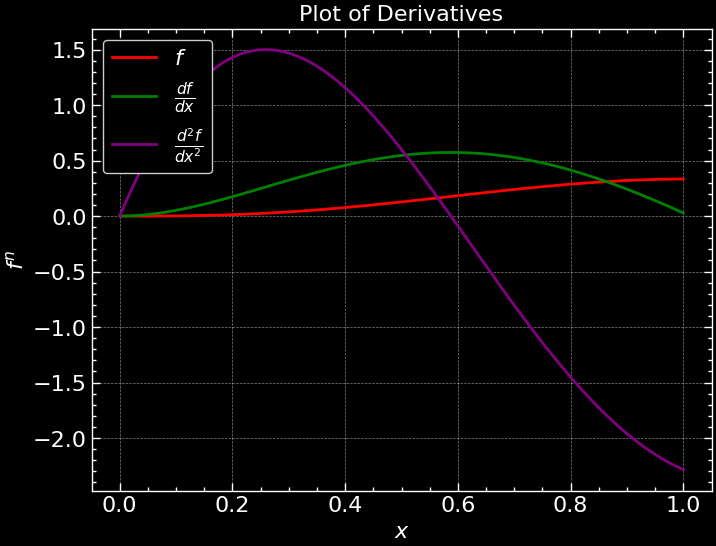

In [14]:
plt.plot(x, f(x), color = 'red', label = '$f$')
plt.plot(x, derivative(f, x, dx = 1e-06, n = 1), color = 'green', label = r'$\frac{df}{dx}$')
plt.plot(x, derivative(f, x, dx = 1e-06, n = 2), color = 'purple', label = r'$\frac{d^2f}{dx^2}$')

plt.title('Plot of Derivatives')
plt.legend(loc = 'upper left')
plt.xlabel('$x$')
plt.ylabel('$f^n$')

### ANTIDERIVATIVES

In [4]:
from scipy.integrate import quad, dblquad

$$\int_0^1 x^2 \sin (2x) e^{-x}\,dx$$

In [60]:
integrand = lambda x: x ** 2 * np.sin(2 * x) * np.exp(-x)
integral, error = quad(integrand, 0, 1)

integral, error

(0.14558175869954834, 1.6162822047366225e-15)

$$\int_0^1 \int_{-x}^{x^2} \sin(x+y^2)\,dydx$$

In [4]:
integrand = lambda y, x: np.sin(x + y ** 2)
integral, error = dblquad(integrand, 0, 1, lambda x: -x, lambda x: x ** 2)

integral, error

(0.590090324408853, 2.0545915475811425e-14)

### INTEGRATING OVER SPARSE FUNCTIONS

Sum of Two Gaussian Functions over a Sparse Domain: $$f(x)=exp(-(x-700)^2)+exp(-x(x+700))$$ with peaks at $x=-700$ and $x=700$

In [62]:
def f(x):
    return np.exp(-(x - 700) ** 2) + np.exp(-(x + 700) ** 2)

x = np.linspace(-750, 750, 1000)
y = f(x)

Text(0, 0.5, '$f$')

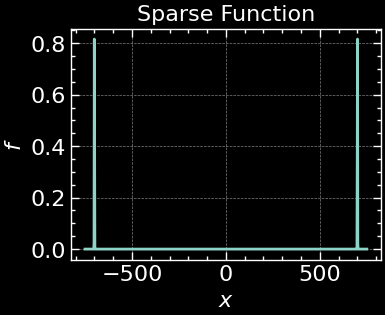

In [63]:
plt.figure(figsize = (4, 3))
plt.plot(x, y)

plt.title('Sparse Function')
plt.xlabel('$x$')
plt.ylabel('$f$')

In [64]:
quad(f, -800, 800, points = [-700, 700]) # THE 'points' ARGUMENT IS REQUIRED TO COMPUTE THE INTEGRAL, PROMPTING quad TO "PAY ATTENTION" TO THIS RANGE WHEN INTEGRATING.

(3.544907701811011, 1.9972548851034084e-10)

### DIFFERENTIAL EQUATIONS

The Drag on a body takes the form$$v'-\alpha v^2+\beta-0$$ $\alpha=-3$, $\beta=-5$ and $v(0)=0$

In [5]:
from scipy.integrate import odeint

In [17]:
def dvdt(v, t):
    return 3 * v ** 2 - 5

v_0 = 0

In [18]:
t = np.linspace(0, 1, 100)
sol = odeint(dvdt, v_0, t)

sol.T[0]

array([ 0.        , -0.05047933, -0.10080451, -0.15082334, -0.20038726,
       -0.24935318, -0.29758502, -0.34495519, -0.39134576, -0.43664948,
       -0.48077056, -0.52362515, -0.56514164, -0.60526086, -0.6439356 ,
       -0.68113064, -0.71682205, -0.75099661, -0.78365109, -0.8147914 ,
       -0.84443176, -0.87259378, -0.89930556, -0.92460079, -0.94851787,
       -0.97109913, -0.99239002, -1.01243837, -1.03129376, -1.04900692,
       -1.06562918, -1.081212  , -1.0958066 , -1.10946355, -1.12223249,
       -1.13416195, -1.14529906, -1.15568941, -1.16537698, -1.17440397,
       -1.18281086, -1.19063623, -1.19791686, -1.20468768, -1.21098179,
       -1.21683053, -1.22226349, -1.22730856, -1.23199199, -1.23633849,
       -1.24037122, -1.24411192, -1.24758094, -1.25079735, -1.25377896,
       -1.25654241, -1.25910322, -1.2614759 , -1.26367394, -1.26570992,
       -1.26759557, -1.26934179, -1.27095869, -1.27245574, -1.27384168,
       -1.27512464, -1.2763122 , -1.27741137, -1.27842865, -1.27

Text(0, 0.5, 'Solutions')

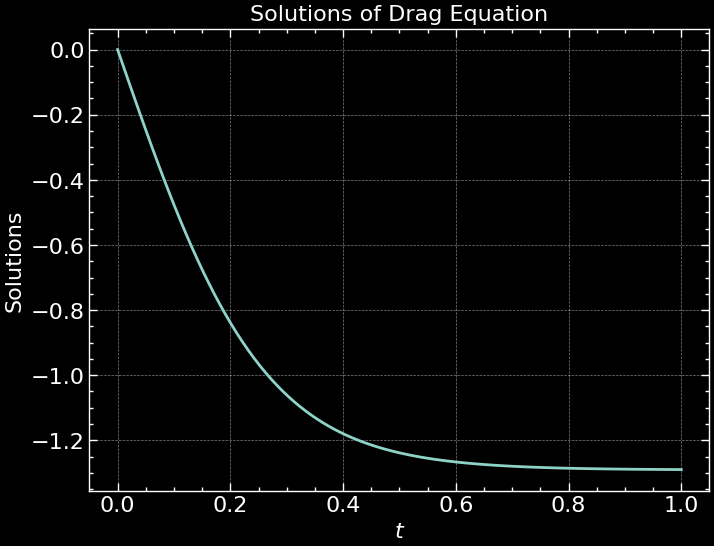

In [19]:
plt.plot(t, sol.T[0])
plt.title('Solutions of Drag Equation')
plt.xlabel('$t$')
plt.ylabel('Solutions')

### PROBLEM 3: COUPLED FIRST ORDER DE

Consider that $$y_1'=y_1+y_2^2+3x$$ $y_1(0)=0$ $$y_2'=3y_1+y_2^3-\cos x$$ $y_2(0)=0$. Let $\vec S=\langle y_1,y_2 \rangle$ and write a function that evaluates $\displaystyle \frac{d\vec S}{dx}$.

In [2]:
def dSdx(S, x):
    y1, y2 = S
    return [y1 + y2 ** 2 + 3 * x, 3 * y1 + y2 ** 3 - np.cos(x)]

y1_0 = y2_0 = 0
S_0 = (y1_0, y2_0)

In [6]:
x = np.linspace(0, 1, 100)
sol = odeint(dSdx, S_0, x)

y1 = sol.T[0]
y2 = sol.T[1]
y1, y2

(array([0.00000000e+00, 1.53914061e-04, 6.19093356e-04, 1.40076628e-03,
        2.50418953e-03, 3.93464633e-03, 5.69744401e-03, 7.79789517e-03,
        1.02413187e-02, 1.30330245e-02, 1.61783065e-02, 1.96824391e-02,
        2.35506573e-02, 2.77881638e-02, 3.24001125e-02, 3.73915921e-02,
        4.27676179e-02, 4.85331404e-02, 5.46930282e-02, 6.12520553e-02,
        6.82148995e-02, 7.55861308e-02, 8.33702071e-02, 9.15714669e-02,
        1.00194121e-01, 1.09242251e-01, 1.18719801e-01, 1.28630571e-01,
        1.38978219e-01, 1.49766252e-01, 1.60998020e-01, 1.72676732e-01,
        1.84805434e-01, 1.97387014e-01, 2.10424222e-01, 2.23919648e-01,
        2.37875730e-01, 2.52294784e-01, 2.67178978e-01, 2.82530347e-01,
        2.98350829e-01, 3.14642248e-01, 3.31406342e-01, 3.48644774e-01,
        3.66359140e-01, 3.84551013e-01, 4.03221942e-01, 4.22373488e-01,
        4.42007253e-01, 4.62124894e-01, 4.82728181e-01, 5.03819005e-01,
        5.25399429e-01, 5.47471735e-01, 5.70038442e-01, 5.931023

Text(0, 0.5, '$y_i$')

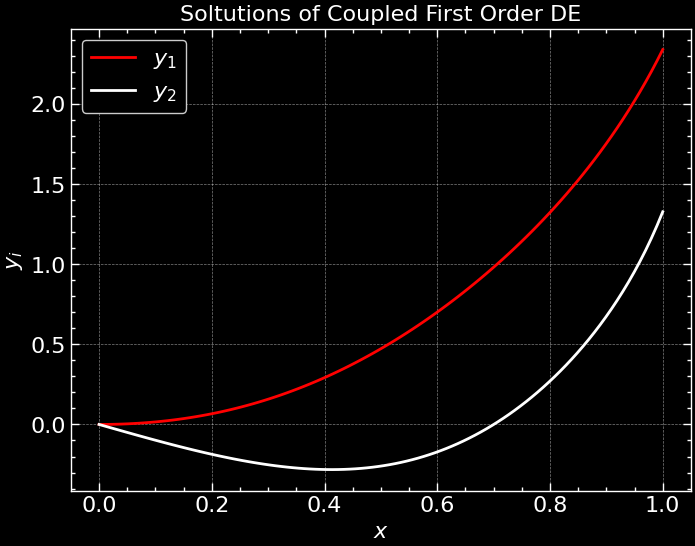

In [7]:
plt.plot(x, y1, color = 'red', label = '$y_1$')
plt.plot(x, y2, color = 'white', label = '$y_2$')

plt.title('Soltutions of Coupled First Order DE')
plt.legend(loc = 'upper left')
plt.xlabel('$x$')
plt.ylabel('$y_i$')

### PROBLEM 3: SECOND ORDER DE (PENDULUM PROBLEM)

The Equation for a pendulum takes the form$$\theta''-\sin \theta = 0$$ Let $\omega=\displaystyle \frac{d\theta}{dt}$ so that $$d\omega/dt=\sin \theta$$ $$d\theta /dt=\omega$$ Also, let $\vec{S}=\langle \theta, \omega \rangle$.

In [23]:
def dSdt(S, t):
    theta, omega = S
    return [omega, np.sin(theta)]

theta0 = np.pi / 4
omega0 = 0
S_0 = (theta0, omega0) 

In [24]:
t = np.linspace(0, 20, 100)

sol = odeint(dSdt, S_0, t)
theta, omega = sol.T

Text(0, 0.5, '$\\theta$')

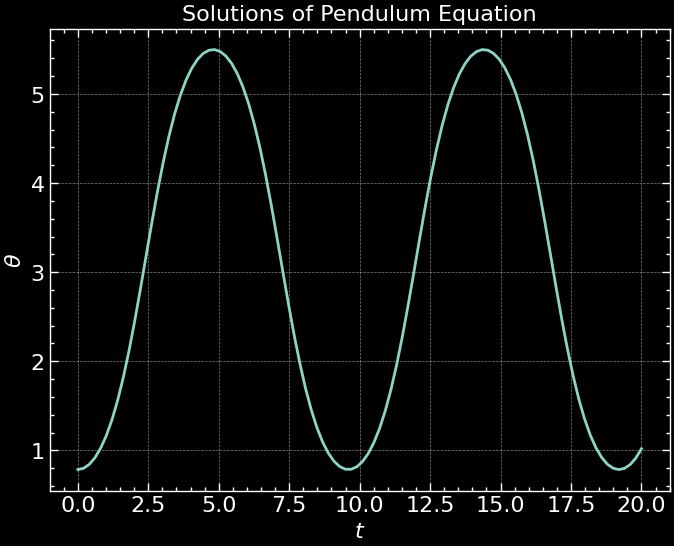

In [25]:
plt.plot(t, theta)
plt.title('Solutions of Pendulum Equation')
plt.xlabel('$t$')
plt.ylabel(r'$\theta$')

### PROBLEM 4: FOURIER TRANSFORMS

The Discrete Fourier Transform is defined as $$y[k]=\sum_{n=0}^{N-1} exp \bigg (-2\pi i n  \bigg \{\frac k N\bigg \}\bigg )\,x[n]$$where
- $k/N$ represents a specific dimensionless frequency
- And can be converted to a frequency in Hz if the spacing in $x$ is obtained.

Predefined Wave:

Text(0, 0.5, '$x$')

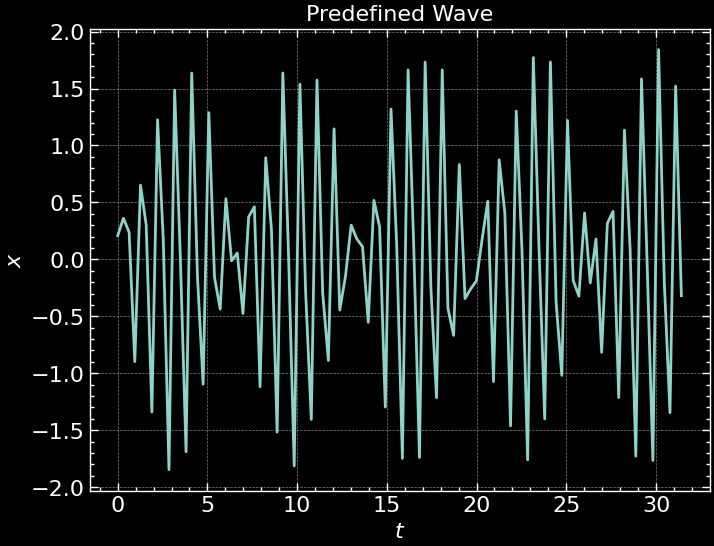

In [26]:
t = np.linspace(0, 10 * np.pi, 100)
x = np.sin(2 * np.pi * t) + np.sin(4 * np.pi * t) + 0.1 * np.random.randn(len(t))

plt.plot(t, x)
plt.title('Predefined Wave')
plt.xlabel('$t$')
plt.ylabel('$x$')

In [27]:
from scipy.fft import fft, fftfreq

In [28]:
N = len(x)
y = fft(x)[: N // 2]
f = fftfreq(N, np.diff(t)[0])[: N // 2]

Text(0, 0.5, '$f$')

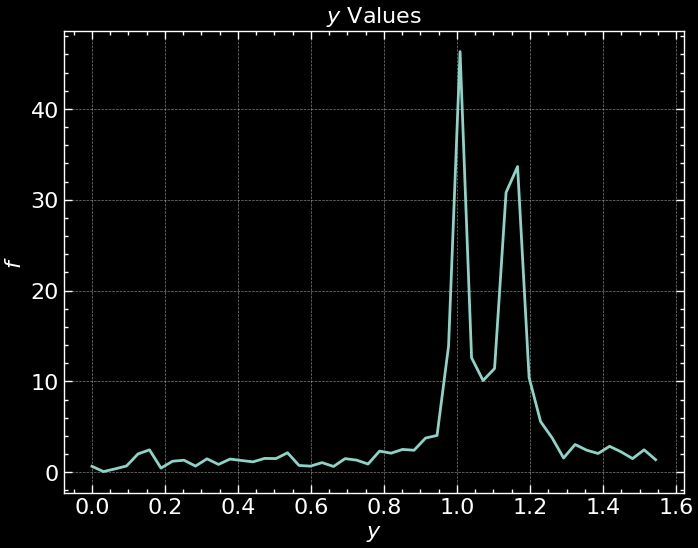

In [29]:
plt.plot(f, np.abs(y))
plt.title(r'$y$ Values')
plt.xlabel('$y$')
plt.ylabel('$f$')

### PROBLEM 5: ENERGY OPTIMIZATION

The Energy required for a particle to travel from one point $\vec r_1$ to another point $\vec r_2$ is given by $$E=\alpha \int_C \bigg | \frac{d\vec r}{dt} \bigg | \,dt-\int_C \vec F \cdot \frac{d\vec r}{dt}\,dt$$

Suppose $\alpha=5$, $\vec r_1 =(0,0)$, $\vec r_2=(0,10)$. The wind produces a field $\displaystyle \vec F= \bigg (0,\frac{-2}{(x+1)^2}\bigg )$. Find the optimal value of $A$ in $$\vec r=A \sin (t\pi / 10)\hat x + t\hat y$$ that minimizes the work.

Solution:
- $x = A \sin(t\pi/10)$, $y=t$, and $$\bigg | \frac{d\vec r}{dt} \bigg |=\sqrt{1+(\pi A^2/10)^2 \cos^2(t\pi /10)}$$ $$\vec F \cdot \frac{d \vec r}{dt}= \begin{bmatrix} 0 \\ - 2/(A \sin(t\pi/10)+1)^2 \end{bmatrix} \cdot \begin{bmatrix} (A\pi / 10) \cos (t\pi/10) \\ 1 \end{bmatrix}  = - \frac{2}{(A \sin(t\pi/10)+1)^2}$$
- so that $$E=\int_0^{10} 5 \sqrt{1+(\pi A/10)^2 \cos^2(t\pi /10)}+\frac{2}{(A \sin(t\pi/10)+100)^2}\,dt$$

In [24]:
def f(A):
    integrand = lambda t: 2 / (1 + np.abs(A * np.sin(np.pi * t / 10))) ** 2 + 5 * np.sqrt(1 + (np.pi * A / 10) ** 2 * np.cos(t * np.pi / 10) ** 2)
    return quad(integrand, 0, 10)[0]

minimize(f, 0.001, method = 'CG').x

array([1.42591231])

### PROBLEM 6: NEWTON'S LAW OF COOLING 

Newton's Law of Cooling is $$\frac{dT}{dt}=-k(T-T_s(t))$$ where
- $T$ is the temperature of an object in the surrounding temperature $T_s(t)$. Find $T(t)$ using the data given.

In [34]:
t_m = np.array([0., 1.0435, 2.0869, 3.1304, 4.1739,
     5.2174, 6.2609, 7.3043, 8.3478, 9.3913,
10.4348, 11.4783, 12.5217, 13.5652, 14.6087,
15.6521, 16.6956, 17.7319, 18.7826, 19.8261,
20.8696, 21.9130, 22.9562, 24.])

temp_m = np.array([283.2323, 284.6945, 286.2259, 287.8604, 289.6441,
                   291.6187, 293.7940, 296.1149, 298.4396, 300.5431,
                   302.1567, 303.0364, 303.0364, 302.1567, 300.5431,
                   298.4396, 296.1149, 293.7940, 291.6187, 289.6441,  
                   287.8604, 286.2259, 284.6945, 283.2323])

In [46]:
T_s = interp1d(t_m, temp_m, kind = 'cubic')

In [44]:
def dTdt(T, t):
    return -0.5 * (T - T_s(t))

times_array = np.linspace(1, 23, 1000)
T0 = 284.6495

sol = odeint(dTdt, T0, times_array).T[0]

Text(0, 0.5, 'Temperature [K]')

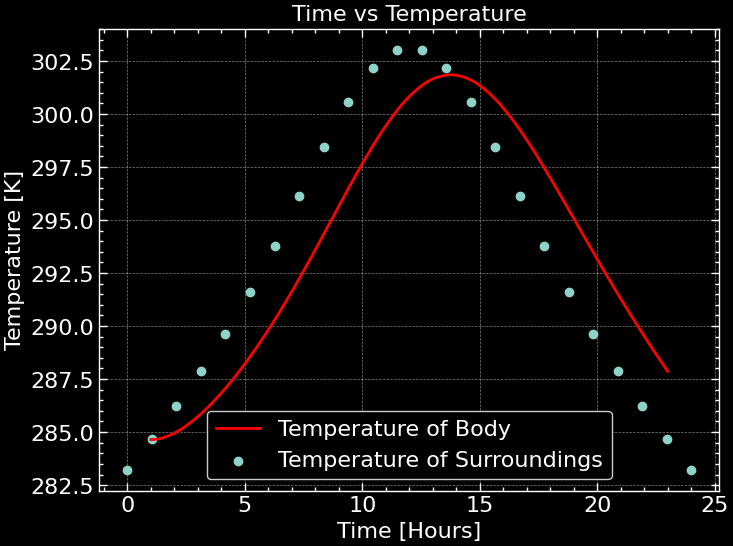

In [45]:
plt.plot(times_array, sol, color = 'red', label = 'Temperature of Body')
plt.scatter(t_m, temp_m, label = 'Temperature of Surroundings')
plt.legend()
plt.title('Time vs Temperature')
plt.xlabel('Time [Hours]')
plt.ylabel('Temperature [K]')

## SECTION 3: LINEAR ALGEBRA

### TRIANGULAR MATRICES

$$\begin{bmatrix} 3 & 0 & 0 & 0 \\ 2 & 1 & 0 & 0 \\ 1 & 0 & 1 & 0 \\ 1 & 1 & 1 & 1 \end{bmatrix}=\vec x \begin{bmatrix} 4 \\ 2 \\ 4 \\ 2 \end{bmatrix}$$

In [43]:
from scipy.linalg import solve_triangular

In [44]:
a = np.array([[3, 0, 0, 0],
              [2, 1, 0, 0],
              [1, 0, 1, 0],
              [1, 1, 1, 1]])
b = np.array([4, 2, 4, 2])

solve_triangular(a, b, lower = True)

array([ 1.33333333, -0.66666667,  2.66666667, -1.33333333])

### TOEPLITZ MATRICES (THE ONES WITH CONSTANT DIAGONALS)

$$\begin{bmatrix} 1 & -1 & 2 & 3 \\ 3 & 1 & -1 & 2 \\ 6 & 3 & 1 & -1 \\ 10 & 6 & 3 & 1 \end{bmatrix}=\vec x \begin{bmatrix} 1 \\ 2 \\ 2 \\ 5 \end{bmatrix}$$

In [45]:
from scipy.linalg import toeplitz, solve_toeplitz

In [49]:
c1 = np.array([1, 3, 6, 10])
r1 = np.array([1, -1, 2, 3])

b = np.array([1, 2, 2, 5])

solve_toeplitz((c1, r1), b)

array([ 0.17741935,  0.48387097, -0.0483871 ,  0.46774194])

### EIGENVALUE OPTIMIZATION FOR A TRIDIAGONAL MATRIX

$$\begin{bmatrix} 3 & -1 & 0 & 0 \\ -1 & 3 & -1 & 0 \\ 0 & -1 & 3 & -1 \\ 0 & 0 & -1 & 3 \end{bmatrix}\vec x=\lambda \vec x$$

In [50]:
from scipy.linalg import eigh_tridiagonal

In [60]:
diag = 3 * np.ones(4)
off_diag = -1 * np.ones(3)
w, v = eigh_tridiagonal(diag, off_diag)

In [61]:
v.T[0]

array([0.37174803, 0.60150096, 0.60150096, 0.37174803])

### FIEDLER MATRICES

Feidler's Matrix $A_{ij}=|a_i-a_j|$ where $a_i$ is some sequence of numbers

In [63]:
from scipy.linalg import fiedler
fiedler([1, 4, 12, 45])

array([[ 0,  3, 11, 44],
       [ 3,  0,  8, 41],
       [11,  8,  0, 33],
       [44, 41, 33,  0]])

### DECOMPOSITIONS

LU Decomposition: $A=PLU$ where
- $P$ is a Permutation Matrix
- $L$ is a Lower Triangular Matrix
- $U$ is a Upper Triangular Matrix.

In [67]:
from scipy.linalg import lu
A = np.array([[2, 5, 7, 8], [5, 2, 2, 8], [7, 5, 6, 6,], [5, 4, 4, 8]])

In [68]:
P, L, U = lu(A)
P, L, U

(array([[0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.]]),
 array([[ 1.        ,  0.        ,  0.        ,  0.        ],
        [ 0.28571429,  1.        ,  0.        ,  0.        ],
        [ 0.71428571,  0.12      ,  1.        ,  0.        ],
        [ 0.71428571, -0.44      , -0.04347826,  1.        ]]),
 array([[ 7.        ,  5.        ,  6.        ,  6.        ],
        [ 0.        ,  3.57142857,  5.28571429,  6.28571429],
        [ 0.        ,  0.        , -0.92      ,  2.96      ],
        [ 0.        ,  0.        ,  0.        ,  6.60869565]]))

Cholesky Decomposition: Finding $C$ so that $A=CC^T$

In [69]:
from scipy.linalg import cholesky
A = np.array([[1, 0.4], [0.4, 1]])

In [74]:
cholesky(A, lower = True), cholesky(A, lower = False)

(array([[1.        , 0.        ],
        [0.4       , 0.91651514]]),
 array([[1.        , 0.4       ],
        [0.        , 0.91651514]]))

### THE KRONECKER SUM AND PRODUCT, AND SPARSE MATRICES (CONTAIN LOTS OF ZEROS)

In [78]:
from scipy.linalg import kron # PRODUCT, NOT SUM

N = 3
diag = -2 * np.ones(N)
off_diag = np.ones(N - 1)
D = np.diag(diag) + np.diag(off_diag, k = 1) + np.diag(off_diag, k = -1)

In [79]:
D

array([[-2.,  1.,  0.],
       [ 1., -2.,  1.],
       [ 0.,  1., -2.]])

In [80]:
D_ksum = kron(D, np.identity(N)) + kron(np.identity(N), D)
D_ksum # RETURNS A N^2 x N^2 = 9 X 9 MATRIX

array([[-4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -4.,  1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0., -4.,  1.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  1., -4.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  1., -4.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0., -4.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  1., -4.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  1., -4.]])

In [82]:
from scipy import sparse

In [84]:
N = 5
diag = np.ones([N])
diags = np.array([diag, -2 * diag, diag])

D = sparse.spdiags(diags, np.array([-1, 0, 1]), N, N)

In [85]:
sparse.kronsum(D, D)

<25x25 sparse matrix of type '<class 'numpy.float64'>'
	with 325 stored elements (blocksize = 5x5) in Block Sparse Row format>

## SECTION 4: STATISTICS

### $\beta$-DISTRIBUTION

For $0 \leq x \leq 1$:$$f(x;a,b)=\frac{\Gamma(a+b)x^{a-1}(1-x)^{b-1}}{\Gamma(a)\Gamma(b)}$$

In [50]:
from scipy.stats import beta

In [48]:
a, b = 2.6, 4.9
mean, var, skew, kurt = beta.stats(a, b, moments = 'mvsk')

mean, var, skew, kurt

(array(0.34666667), array(0.02664575), array(0.39551137), array(-0.35913174))

Text(0, 0.5, '$f$')

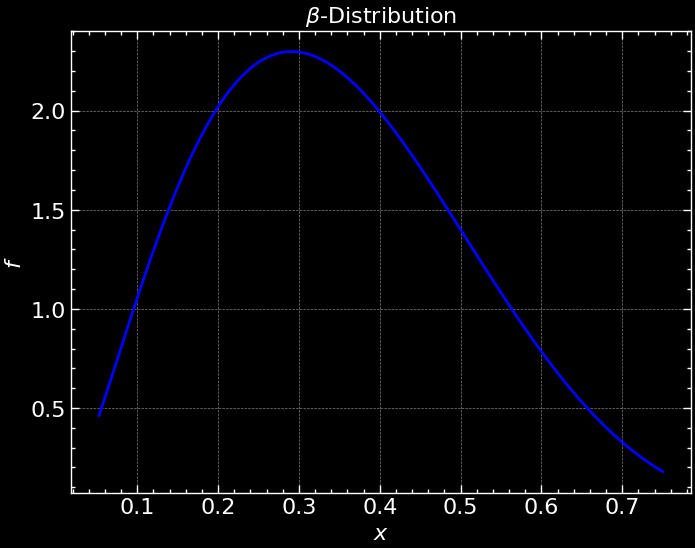

In [54]:
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

plt.plot(x, beta.pdf(x, a, b), color = 'blue')
plt.title(r'$\beta$-Distribution')
plt.xlabel('$x$')
plt.ylabel('$f$')

### GAUSSIAN DISTRIBUTION

For $-\infty \leq x \leq \infty$: $$f(x;\mu,\sigma)=\frac{1}{\sigma \sqrt{2 \pi}}\,exp \bigg \{-\frac{(x-\mu)^2}{\sigma^2} \bigg \}$$

In [51]:
from scipy.stats import norm

In [52]:
mu, sigma = 1, 2
mean, var = norm.stats(loc = mu, scale = sigma, moments = 'mv')

mean, var

(array(1.), array(4.))

Text(0, 0.5, '$f$')

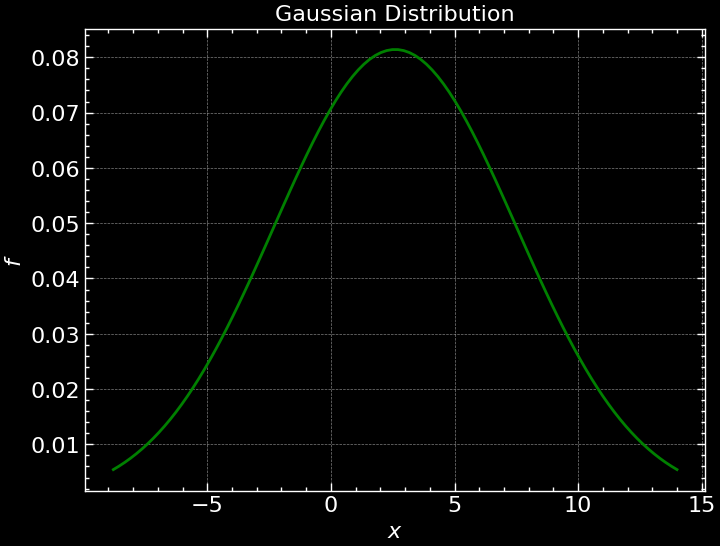

In [53]:
x = np.linspace(norm.ppf(0.01, a, b), norm.ppf(0.99, a, b), 100)

plt.plot(x, norm.pdf(x, a, b), color = 'green')
plt.title('Gaussian Distribution')
plt.xlabel('$x$')
plt.ylabel('$f$')

### MULTINOMIAL DISTRIBUTION

$$f(x_1,x_2,...,x_k;p_1,p_2,...,p_k,n)=\frac{n!}{x_1!x_2!...x_k!}{p_1}^{x_1}{p_2}^{x_2}....{p_k}^{x_k}$$
For Rolling a 6-sided die:

In [95]:
from scipy.stats import multinomial

In [97]:
p = np.ones(6) / 6
multinomial.pmf([6 ,0, 0, 0, 0, 0], n = 6, p = p)

2.143347050754453e-05

In [98]:
multinomial.rvs(n = 100, p = p, size = 5)

array([[15, 17, 15, 25, 16, 12],
       [13, 19, 16, 20, 21, 11],
       [19, 15, 18, 13, 17, 18],
       [16, 21, 20, 17, 15, 11],
       [15, 27, 16, 13, 13, 16]])